In [33]:
import matplotlib.pyplot as plt
import networkx as nx
import csv
import pandas as pd
from collections import Counter, OrderedDict
import math
from itertools import permutations, combinations
import seaborn as sns
from networkx.algorithms import bipartite as bp

In [2]:
G=nx.Graph()

In [3]:
with open('dataset_new.csv', encoding='utf-8', newline='') as csvfile:
    datareader = csv.reader(csvfile, delimiter=' ')
    all_authors_nodes = []
    for row in datareader:
        names = row[0].split(', ')
        i = 0
        for word in names:
            word1 = word.split(' ')
            if word1[0].endswith('.') and len(word1)==2:
                word1[0], word1[1] = word1[1], word1[0]
                word = ' '.join(word1)
                names[i] = word
                i+=1
        all_authors_nodes.append(names)

In [4]:
all_authors_edges = []
for item in all_authors_nodes:
    if len(item) == 2:
        all_authors_edges.append(tuple(item))
    elif len(item) > 2:
        A = combinations(item,2)
        for comb in A:
            all_authors_edges.append(comb)

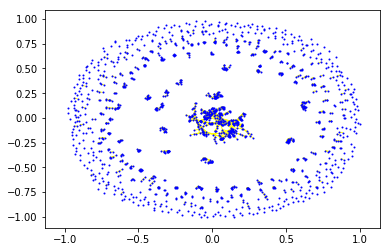

In [5]:
for nodes in all_authors_nodes:
    G.add_nodes_from(nodes)
G.add_edges_from(all_authors_edges)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos, node_color = "blue", node_size = 1)
nx.draw_networkx_edges(G,pos, edge_color = "yellow")
plt.show()

In [34]:
nx.write_gml(G,'authorsgraph.gml')

In [30]:
print(nx.info(G))
print('Dencity: ', nx.density(G))

Name: 
Type: Graph
Number of nodes: 1641
Number of edges: 2371
Average degree:   2.8897
Dencity:  0.0017620130497465853


In [ ]:
count = Counter()
surnames = []
for d in all_authors_nodes:
    for sur in d:
        surnames.append(sur)
count = Counter(surnames)
#print(len(set(surnames)))
#print (count.most_common(50))
com = count.most_common(50)
for co in com:
    print(co[0],list(G.neighbors(co[0])), len(list(G.neighbors(co[0]))))

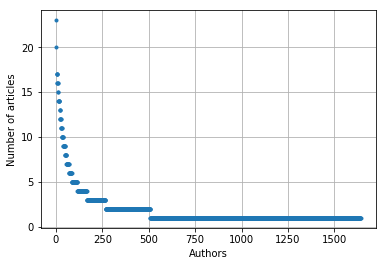

In [11]:
x = range(1,len(count.values())+1)
plt.plot(x,sorted(count.values(),reverse=True),'.')
plt.grid(True,which='both')
plt.ylabel('Number of articles')
plt.xlabel('Authors')
plt.show()

In [10]:
cores=nx.core_number(G)
print (OrderedDict(sorted(cores.items(), key=lambda t: t[1])))

OrderedDict([('Апресян В.', 0), ('Архипов Александр', 0), ('А.Бонч-Осмоловская', 0), ('Бабкин A.В.', 0), ('Безвербный И.Г.', 0), ('Буторина Е.П.', 0), ('Ю.В.', 0), ('Дубинский А. Г.', 0), ('Ермакова О.И.', 0), ('О.В.', 0), ('Филимонова Е.Ю.', 0), ('П.Гращенков', 0), ('Д.Иванов', 0), ('Е.А.', 0), ('Т.П.', 0), ('Измайлова А.Э.', 0), ('Н.В.', 0), ('О.А.', 0), ('К.И.', 0), ('Калинина Е.Ю.', 0), ('И.М.', 0), ('Крылова Т.В.', 0), ('Ханина О.', 0), ('Александр Костыркин', 0), ('Красикова Т.И.', 0), ('С.А.', 0), ('Н.Н.', 0), ('А.С.', 0), ('Ножов И.', 0), ('Н.А.', 0), ('Е.В.', 0), ('Л.Г.', 0), ('Паршин П.Б.', 0), ('В.И.', 0), ('Мария Ровинская', 0), ('Ф.И.', 0), ('Н.К.', 0), ('Н.Ф.', 0), ('Светова С.Ю.', 0), ('С.Ю.', 0), ('В.Б.', 0), ('А.В.', 0), ('Соловьев В.Д', 0), ('Шевченко А.И.', 0), ('В.М.', 0), ('Занадворова А.', 0), ('Е.Н.', 0), ('И.В.', 0), ('Леонид Захаров', 0), ('В.', 0), ('Е.Г.', 0), ('С.Г.', 0), ('А.Н.', 0), ('Е.П.', 0), ('Е.Р.', 0), ('В.А.', 0), ('М.Е.', 0), ('С.В.', 0), ('К.А.', 

In [12]:
A = nx.adjacency_matrix(G)
print(A)

  (0, 1)	1
  (1, 0)	1
  (2, 3)	1
  (2, 118)	1
  (2, 833)	1
  (3, 2)	1
  (5, 6)	1
  (5, 7)	1
  (6, 5)	1
  (6, 7)	1
  (7, 5)	1
  (7, 6)	1
  (9, 10)	1
  (9, 448)	1
  (9, 1045)	1
  (10, 9)	1
  (10, 176)	1
  (10, 362)	1
  (10, 513)	1
  (14, 15)	1
  (14, 16)	1
  (14, 17)	1
  (14, 18)	1
  (14, 19)	1
  (14, 20)	1
  :	:
  (1629, 1626)	1
  (1629, 1627)	1
  (1629, 1628)	1
  (1629, 1630)	1
  (1630, 1369)	1
  (1630, 1544)	1
  (1630, 1622)	1
  (1630, 1626)	1
  (1630, 1627)	1
  (1630, 1628)	1
  (1630, 1629)	1
  (1631, 668)	1
  (1631, 869)	1
  (1632, 1052)	1
  (1632, 1633)	1
  (1633, 1052)	1
  (1633, 1632)	1
  (1634, 1562)	1
  (1634, 1563)	1
  (1635, 1450)	1
  (1636, 144)	1
  (1637, 1638)	1
  (1638, 1637)	1
  (1640, 1348)	1
  (1640, 1568)	1


In [13]:
print(A.todense())

[[0 1 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


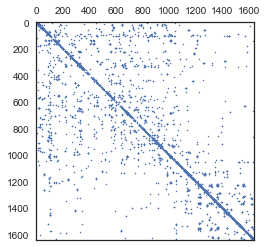

In [14]:
sns.set(style="white")
plt.spy(A, precision=0, marker='.', markersize=3)
plt.show()

In [15]:
nx.degree_assortativity_coefficient(G)

0.40811045564606624

In [36]:
print(nx.graph_number_of_cliques(G))
cl=list(nx.find_cliques(G)) 
#print (cl)

959


In [26]:
centr = nx.degree_centrality(G)
print(OrderedDict(sorted(centr.items(), key=lambda t: t[1])))

OrderedDict([('Апресян В.', 0.0), ('Архипов Александр', 0.0), ('А.Бонч-Осмоловская', 0.0), ('Бабкин A.В.', 0.0), ('Безвербный И.Г.', 0.0), ('Буторина Е.П.', 0.0), ('Ю.В.', 0.0), ('Дубинский А. Г.', 0.0), ('Ермакова О.И.', 0.0), ('О.В.', 0.0), ('Филимонова Е.Ю.', 0.0), ('П.Гращенков', 0.0), ('Д.Иванов', 0.0), ('Е.А.', 0.0), ('Т.П.', 0.0), ('Измайлова А.Э.', 0.0), ('Н.В.', 0.0), ('О.А.', 0.0), ('К.И.', 0.0), ('Калинина Е.Ю.', 0.0), ('И.М.', 0.0), ('Крылова Т.В.', 0.0), ('Ханина О.', 0.0), ('Александр Костыркин', 0.0), ('Красикова Т.И.', 0.0), ('С.А.', 0.0), ('Н.Н.', 0.0), ('А.С.', 0.0), ('Ножов И.', 0.0), ('Н.А.', 0.0), ('Е.В.', 0.0), ('Л.Г.', 0.0), ('Паршин П.Б.', 0.0), ('В.И.', 0.0), ('Мария Ровинская', 0.0), ('Ф.И.', 0.0), ('Н.К.', 0.0), ('Н.Ф.', 0.0), ('Светова С.Ю.', 0.0), ('С.Ю.', 0.0), ('В.Б.', 0.0), ('А.В.', 0.0), ('Соловьев В.Д', 0.0), ('Шевченко А.И.', 0.0), ('В.М.', 0.0), ('Занадворова А.', 0.0), ('Е.Н.', 0.0), ('И.В.', 0.0), ('Леонид Захаров', 0.0), ('В.', 0.0), ('Е.Г.', 0.0)

In [32]:
closeness = nx.closeness_centrality(G)
print(OrderedDict(sorted(closeness.items(), key=lambda t: t[1])))

OrderedDict([('Апресян В.', 0.0), ('Архипов Александр', 0.0), ('А.Бонч-Осмоловская', 0.0), ('Бабкин A.В.', 0.0), ('Безвербный И.Г.', 0.0), ('Буторина Е.П.', 0.0), ('Ю.В.', 0.0), ('Дубинский А. Г.', 0.0), ('Ермакова О.И.', 0.0), ('О.В.', 0.0), ('Филимонова Е.Ю.', 0.0), ('П.Гращенков', 0.0), ('Д.Иванов', 0.0), ('Е.А.', 0.0), ('Т.П.', 0.0), ('Измайлова А.Э.', 0.0), ('Н.В.', 0.0), ('О.А.', 0.0), ('К.И.', 0.0), ('Калинина Е.Ю.', 0.0), ('И.М.', 0.0), ('Крылова Т.В.', 0.0), ('Ханина О.', 0.0), ('Александр Костыркин', 0.0), ('Красикова Т.И.', 0.0), ('С.А.', 0.0), ('Н.Н.', 0.0), ('А.С.', 0.0), ('Ножов И.', 0.0), ('Н.А.', 0.0), ('Е.В.', 0.0), ('Л.Г.', 0.0), ('Паршин П.Б.', 0.0), ('В.И.', 0.0), ('Мария Ровинская', 0.0), ('Ф.И.', 0.0), ('Н.К.', 0.0), ('Н.Ф.', 0.0), ('Светова С.Ю.', 0.0), ('С.Ю.', 0.0), ('В.Б.', 0.0), ('А.В.', 0.0), ('Соловьев В.Д', 0.0), ('Шевченко А.И.', 0.0), ('В.М.', 0.0), ('Занадворова А.', 0.0), ('Е.Н.', 0.0), ('И.В.', 0.0), ('Леонид Захаров', 0.0), ('В.', 0.0), ('Е.Г.', 0.0)